In [1]:
import pandas as pd
from pprint import pprint
from utils.imgShow import imgShow, imsShow
import matplotlib.pyplot as plt
from utils.metric_process import smooth


In [2]:
path_metric_deeplabv3plus = 'model_trained/deeplabv3plus_trained_metrics.csv'
path_metric_deeplabv3plus_mobilev2 = 'model_trained/deeplabv3plus_mobilev2_trained_metrics.csv'
path_metric_watnet = 'model_trained/watnet_trained_metrics.csv'
metric_deeplabv3plus = pd.read_csv(path_metric_deeplabv3plus)
metric_deeplabv3plus_mobilev2 = pd.read_csv(path_metric_deeplabv3plus_mobilev2)
metric_watnet = pd.read_csv(path_metric_watnet)
print(metric_deeplabv3plus.tail(2))


     tra_loss    tra_oa  tra_miou  val_loss    val_oa  val_miou
198  0.045519  0.976811  0.950415  0.065071  0.963530  0.925612
199  0.049611  0.973709  0.945941  0.065124  0.964791  0.925780


In [3]:
metric_deeplabv3plus_smooth_x, metric_deeplabv3plus_smooth_y = smooth(metric_deeplabv3plus['val_miou'].to_numpy(), num_sam=20)
metric_deeplabv3plus_mobilev2_smooth_x, metric_deeplabv3plus_mobilev2_smooth_y = smooth(metric_deeplabv3plus_mobilev2['val_miou'].to_numpy(), num_sam=20)
metric_watnet_smooth_x, metric_watnet_smooth_y = smooth(metric_watnet['val_miou'].to_numpy(), num_sam=20)


Text(0.5, 1.0, 'validation miou')

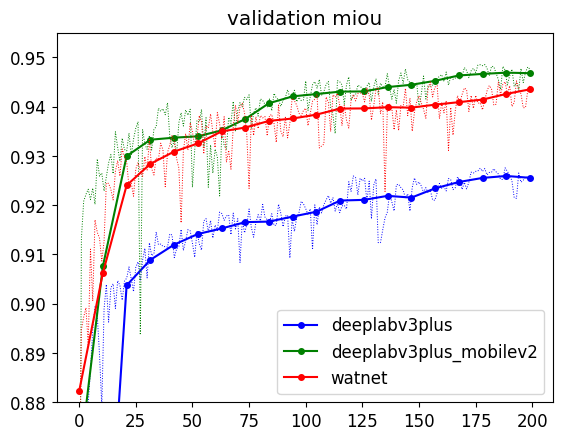

In [4]:
plt.rcParams.update({'font.size': 12})
color = ['blue', 'green', 'red']
### deeplabv3plus
plt.plot(metric_deeplabv3plus['val_miou'], color=color[0], linestyle='dotted', linewidth = 0.7)
plt.plot(metric_deeplabv3plus_smooth_x, metric_deeplabv3plus_smooth_y, color=color[0], \
            marker='o', markerfacecolor=color[0], markersize=4, linewidth=1.5, label= 'deeplabv3plus')
### deeplabv3plus_mobilev2
plt.plot(metric_deeplabv3plus_mobilev2['val_miou'], color=color[1], linestyle='dotted', linewidth = 0.7)
plt.plot(metric_deeplabv3plus_mobilev2_smooth_x, metric_deeplabv3plus_mobilev2_smooth_y, color=color[1], \
                    marker='o', markerfacecolor = color[1], markersize=4, linewidth = 1.5,label= 'deeplabv3plus_mobilev2')
### watnet
plt.plot(metric_watnet['val_miou'], color=color[2], linestyle='dotted', linewidth = 0.7)
plt.plot(metric_watnet_smooth_x, metric_watnet_smooth_y, color=color[2], \
                    marker='o', markerfacecolor = color[2], markersize=4, linewidth = 1.5,label= 'watnet')

plt.ylim(0.88, 0.955)
plt.legend()
plt.title('validation miou')
